# CASO. Estandarizar y escalar valores numéricos para su uso posterior

## Conjunto de datos atmosféricos

Estandarizar y escalar valores numéricos son técnicas comunes en el análisis de datos para garantizar que las variables numéricas tengan una escala comparable:

- **Estandarizar** transforma los datos para que tengan media 0 y desviación estándar 1, ajustando cada valor según su distancia relativa de la media. Se usa cuando los datos tienen diferentes unidades o distribuciones.
  
- **Escalar** ajusta los valores numéricos a un rango definido, normalmente entre 0 y 1, sin alterar su distribución relativa. Es útil cuando las magnitudes de las variables difieren significativamente.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Cargar los datos desde una URL
url = 'https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/SolarPrediction.csv'

datos = pd.read_csv(url)
datos

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
# Ver información sobre las columnas de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
# Especificar las columnas numéricas que queremos estandarizar o escalar
columnas_numericas = ['Temperature', 'Humidity']

print(columnas_numericas)

['Temperature', 'Humidity']


# 1. **Estandarización (Standardization)**
La estandarización transforma los valores de los datos para que tengan una **media de 0** y una **desviación estándar de 1**. Esto se hace restando la media y dividiendo por la desviación estándar de cada característica.

La fórmula es:
\[
z = \frac{x - \mu}{\sigma}
\]
Donde:
- \(x\) es el valor original,
- \(\mu\) es la media de la característica,
- \(\sigma\) es la desviación estándar de la característica.

#### Cuándo usarla:
- Es útil cuando los datos tienen distribuciones normales o gausianas.
- En algoritmos que dependen de la distribución de los datos, como los modelos que usan distancias (por ejemplo, k-Nearest Neighbors o SVM), porque ayuda a que todas las características tengan la misma escala.

In [ ]:
# 1. Estandarización (media = 0, desviación estándar = 1)
escalador_estandar = StandardScaler()
datos_estandarizados = pd.DataFrame(escalador_estandar.fit_transform(datos[columnas_numericas]), columns=columnas_numericas)

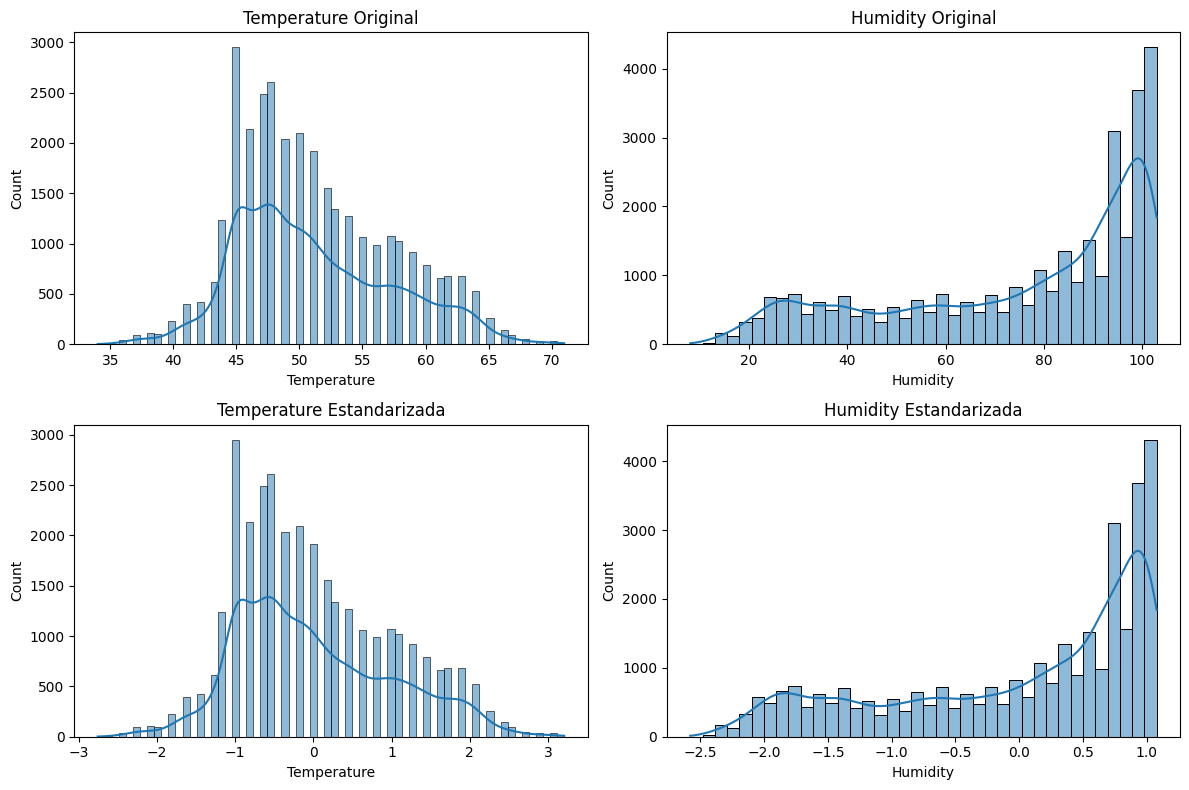

In [ ]:
# Graficar histogramas antes y después de estandarizar
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráficos originales
sns.histplot(datos['Temperature'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Temperature Original')

sns.histplot(datos['Humidity'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Humidity Original')


# Gráficos estandarizados
sns.histplot(datos_estandarizados['Temperature'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Temperature Estandarizada')

sns.histplot(datos_estandarizados['Humidity'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Humidity Estandarizada')

plt.tight_layout()
plt.show()

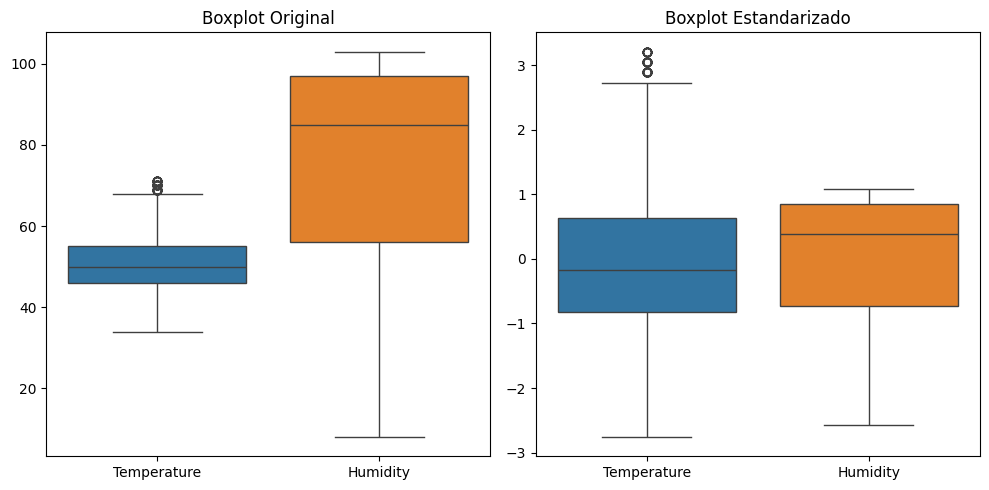

In [ ]:
# Graficar diagramas de caja (box plot) para comparar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot original
sns.boxplot(data=datos[columnas_numericas], ax=axes[0])
axes[0].set_title('Boxplot Original')

# Boxplot estandarizado
sns.boxplot(data=datos_estandarizados, ax=axes[1])
axes[1].set_title('Boxplot Estandarizado')

plt.tight_layout()
plt.show()

# 2. **Escalado (Scaling o Min-Max Scaling)**
El escalado ajusta los valores numéricos a un rango específico, normalmente entre 0 y 1, utilizando la siguiente fórmula:

\[
x_{\text{scaled}} = \frac{x - \min(X)}{\max(X) - \min(X)}
\]\

Donde:
- \(x\) es el valor original,
- \(\min(X)\) y \(\max(X)\) son los valores mínimo y máximo de la característica.

#### Cuándo usarla:
- Es útil cuando quieres que los valores de las características estén en un rango específico (por ejemplo, entre 0 y 1).
- En algoritmos que son sensibles a las magnitudes, como redes neuronales o algoritmos basados en gradiente, donde valores fuera de un rango pequeño pueden provocar problemas en la convergencia.

In [ ]:
# 2. Escalamiento (normalización entre 0 y 1)
escalador_minmax = MinMaxScaler()
datos_escalados = pd.DataFrame(escalador_minmax.fit_transform(datos[columnas_numericas]), columns=columnas_numericas)

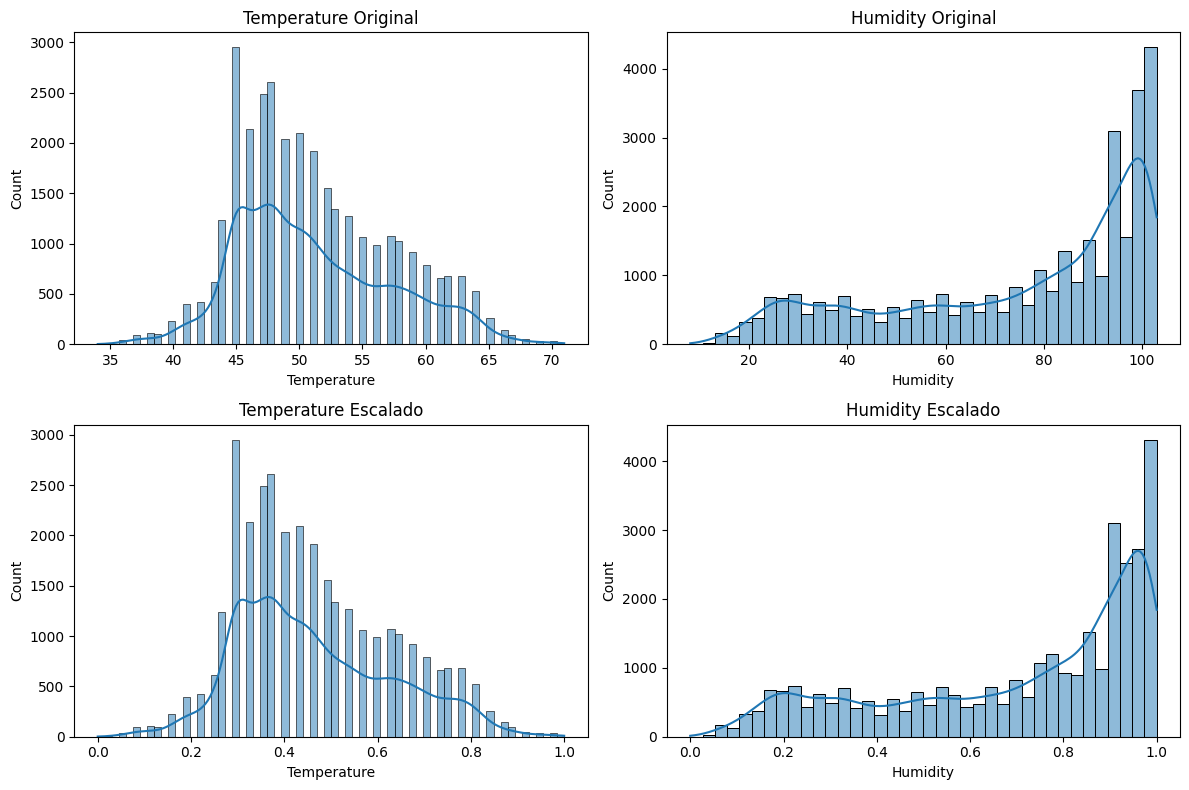

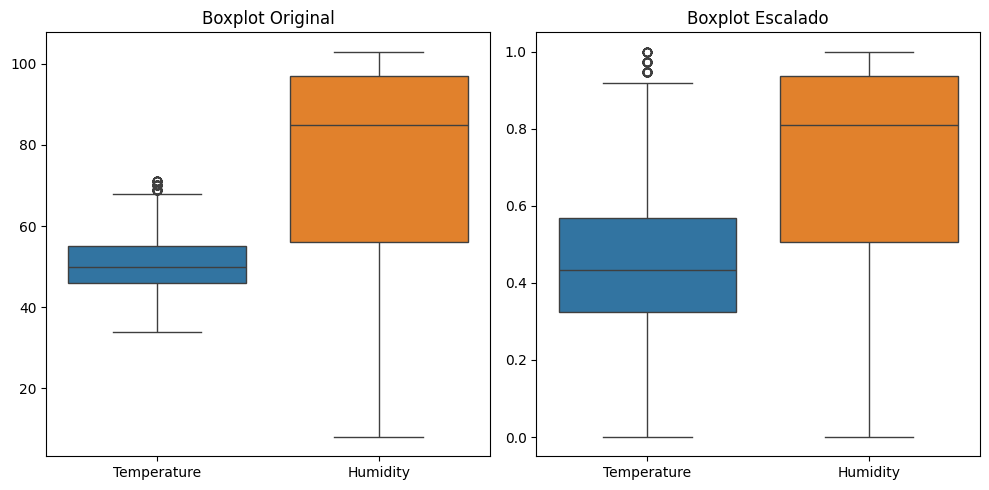

In [ ]:
# Graficar histogramas antes y después de escalar
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráficos originales
sns.histplot(datos['Temperature'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Temperature Original')

sns.histplot(datos['Humidity'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Humidity Original')

# Gráficos escalados
sns.histplot(datos_escalados['Temperature'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Temperature Escalado')

sns.histplot(datos_escalados['Humidity'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Humidity Escalado')

plt.tight_layout()
plt.show()

# Graficar diagramas de caja (box plot) para comparar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot original
sns.boxplot(data=datos[columnas_numericas], ax=axes[0])
axes[0].set_title('Boxplot Original')

# Boxplot escalado
sns.boxplot(data=datos_escalados, ax=axes[1])
axes[1].set_title('Boxplot Escalado')

plt.tight_layout()
plt.show()

### Diferencias clave:
- **Estandarización** convierte los datos para que tengan una media de 0 y una desviación estándar de 1. No restringe el rango de los valores.
- **Escalado** ajusta los valores a un rango específico, normalmente entre 0 y 1 o -1 y 1, pero no altera la distribución en términos de media o desviación estándar.

### Ejemplos de cuándo usar cada uno:
- **Estandarización**: Cuando trabajas con algoritmos como regresión lineal, SVM o PCA, donde las características con diferentes escalas pueden influir en los resultados.
- **Escalado**: En redes neuronales o modelos basados en distancia (como K-Means), donde los valores absolutos y sus rangos tienen una influencia directa en el rendimiento.

Ambas técnicas son esenciales cuando los datos tienen diferentes unidades o escalas, ya que permiten que todas las características tengan el mismo peso en los modelos de machine learning.

# Interpretación al estandarizar y escalar las variables de **Humedad** y **Temperatura**:

1. **Antes de la transformación**:
   - Las variables **Humedad** y **Temperatura** tienen rangos diferentes. Por ejemplo, la **Humedad** puede variar entre 70% y 85%, mientras que la **Temperatura** podría estar entre 22°C y 35°C. Esto hace que los valores de ambas variables no sean comparables directamente, ya que tienen diferentes escalas y unidades.
   
2. **Después de la estandarización**:
   - Al estandarizar, ambas variables ahora tienen media 0 y desviación estándar 1. Esto significa que los valores de **Humedad** y **Temperatura** están centrados alrededor de 0 y expresados en términos de su desviación de la media (positiva o negativa). Las distribuciones de ambas variables son ahora comparables, permitiendo identificar más fácilmente qué valores están por encima o por debajo del promedio y por cuánto.
   
   - **Utilidad**: La estandarización es útil en modelos estadísticos como regresiones y algoritmos de machine learning, donde las variables necesitan estar en la misma escala para evitar que variables con grandes rangos (como la temperatura) dominen aquellas con pequeños rangos (como la humedad). Por ejemplo, en algoritmos de aprendizaje automático como SVM o K-means, es importante que todas las características tengan una escala similar para mejorar la precisión del modelo.

3. **Después del escalamiento**:
   - Al escalar, los valores de **Humedad** y **Temperatura** están transformados para estar entre 0 y 1. Esto preserva las relaciones relativas entre los valores originales (es decir, si un valor era el doble de grande que otro, seguirá siéndolo tras el escalado), pero ahora ambos están en un rango común.
   
   - **Utilidad**: El escalamiento es útil cuando se requieren valores en un rango específico para algoritmos que dependen de distancias o tasas de aprendizaje, como en redes neuronales. También mejora la interpretabilidad, ya que todas las variables están en la misma escala, lo que facilita la visualización y el análisis de datos.

### Ejemplo de utilidad:
- Si estuvieras desarrollando un modelo para predecir la radiación solar con base en variables como la **Humedad** y **Temperatura**, al tener las variables estandarizadas o escaladas, podrías hacer que el modelo "pese" de manera equitativa a ambas características, en lugar de que la temperatura (con su rango más amplio) influya desproporcionadamente sobre la humedad.